[*********************100%%**********************]  1 of 1 completed
Epoch 1/50
6/6 [==============================] - 4s 31ms/step - loss: 0.0703
Epoch 2/50
6/6 [==============================] - 0s 29ms/step - loss: 0.0104
Epoch 3/50
6/6 [==============================] - 0s 29ms/step - loss: 0.0096
Epoch 4/50
6/6 [==============================] - 0s 29ms/step - loss: 0.0049
Epoch 5/50
6/6 [==============================] - 0s 29ms/step - loss: 0.0057
Epoch 6/50
6/6 [==============================] - 0s 29ms/step - loss: 0.0028
Epoch 7/50
6/6 [==============================] - 0s 29ms/step - loss: 0.0030
Epoch 8/50
6/6 [==============================] - 0s 29ms/step - loss: 0.0022
Epoch 9/50
6/6 [==============================] - 0s 29ms/step - loss: 0.0020
Epoch 10/50
6/6 [==============================] - 0s 30ms/step - loss: 0.0018
Epoch 11/50
6/6 [==============================] - 0s 29ms/step - loss: 0.0017
Epoch 12/50
6/6 [==============================] - 0s 29ms/step - loss:

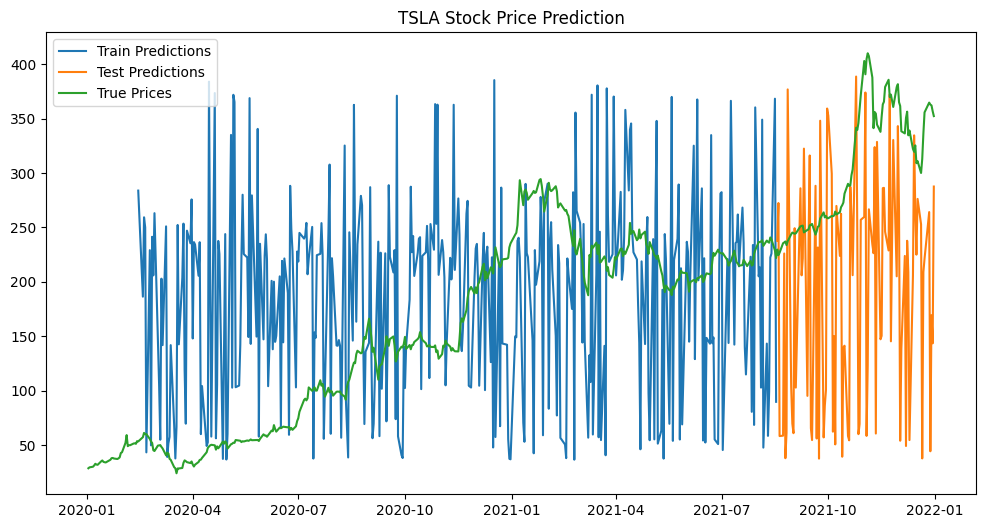

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Fetch historical stock data for Tesla
stock_symbol = 'TSLA'
start_date = '2020-01-01'
end_date = '2022-01-01'
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Extract the 'Close' price column
data = data[['Close']]

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Define a function to create input features and target labels
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i + look_back])
        y.append(dataset[i + look_back])
    return np.array(X), np.array(y)

# Set the look-back window
look_back = 30

# Create the dataset
X, y = create_dataset(data_scaled, look_back)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build an LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform the predictions to get real stock prices
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data.index[look_back:len(train_predictions) + look_back], train_predictions, label='Train Predictions')
plt.plot(data.index[-len(test_predictions):], test_predictions, label='Test Predictions')
plt.plot(data.index, data['Close'], label='True Prices')
plt.legend()
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.show()
